## Homework 6: K means

#### Qingwen Wang


Use the Country-data.csv file again (from HW5), but this time use K-means clustering to cluster the countries by the given features. Is there a value of K that seems best for this data set? 

Now perform K-means with 3 clusters. Give an interpretation of the cluster centroids. Do the members of these clusters align reasonably with your interpretation?

Finally, perform agglomerative clustering with 3 clusters. Compare the result with K-means (also with 3 clusters). How are they different?

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [2]:
from sklearn.model_selection import cross_validate
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error
from sklearn import datasets
from sklearn.metrics import accuracy_score

In [4]:
ctry = pd.read_csv('Country-data.csv')
ctry.head()

,country,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp
0,Afghanistan,90.2,10.0,7.58,44.9,1610,9.44,56.2,5.82,553
1,Albania,16.6,28.0,6.55,48.6,9930,4.49,76.3,1.65,4090
2,Algeria,27.3,38.4,4.17,31.4,12900,16.10,76.5,2.89,4460
3,Angola,119.0,62.3,2.85,42.9,5900,22.40,60.1,6.16,3530
4,Antigua and Barbuda,10.3,45.5,6.03,58.9,19100,1.44,76.8,2.13,12200


In [5]:
Xctry=ctry.drop('country',axis=1)
yctry=ctry['country']

In [12]:
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler

In [10]:
Xctry.mean()

child_mort       38.270060
exports          41.108976
health            6.815689
imports          46.890215
income        17144.688623
inflation         7.781832
life_expec       70.555689
total_fer         2.947964
gdpp          12964.155689
dtype: float64

In [13]:
X_scaled = StandardScaler().fit_transform(Xctry)

In [7]:
def km_mse(inputs,k):
    mse=[]
    for i in range(1,k):
        errors=[]
        kmeans = KMeans(n_clusters=i, n_init=50,random_state=5).fit(inputs)
        for pt,lab in zip(inputs,kmeans.labels_):
            errors.append(np.linalg.norm(pt-kmeans.cluster_centers_[lab])**2)
        mse.append(np.mean(errors))
    return mse

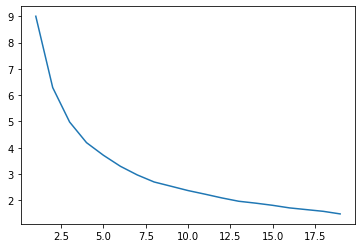

In [18]:
ctry_out=km_mse(X_scaled,20)
plt.plot(list(range(1,20)),ctry_out)

No clear answer here. MSE is keep going small as K grows. And we did see a very significant turning point here. <BR>
Just perform K-means with 3 clusters:

In [24]:
ctry_kmeans = KMeans(n_clusters=3,n_init=20,random_state=0).fit(X_scaled)

In [25]:
for i in range(3):
    print(i+1,":",(ctry_kmeans.labels_==i).sum())

1 : 47
2 : 84
3 : 36


Since the numbers looks balanced, we think it ok to divide into three group.

In [27]:
for col,val in zip(Xctry.columns,ctry_kmeans.cluster_centers_[0]):
    print(col,":",np.round(val,3))

child_mort : 1.36
exports : -0.438
health : -0.156
imports : -0.189
income : -0.687
inflation : 0.402
life_expec : -1.282
total_fer : 1.365
gdpp : -0.604


In [28]:
for col,val in zip(Xctry.columns,ctry_kmeans.cluster_centers_[1]):
    print(col,":",np.round(val,3))

child_mort : -0.406
exports : -0.032
health : -0.224
imports : 0.024
income : -0.252
inflation : -0.017
life_expec : 0.255
total_fer : -0.424
gdpp : -0.354


In [29]:
for col,val in zip(Xctry.columns,ctry_kmeans.cluster_centers_[2]):
    print(col,":",np.round(val,3))

child_mort : -0.827
exports : 0.645
health : 0.727
imports : 0.191
income : 1.484
inflation : -0.485
life_expec : 1.08
total_fer : -0.792
gdpp : 1.616


Basically, countries with better economic status have a better health performance, like higher life expentence, lower mortality rate. <br>
So, centroid 1 can be describing developing countries; centroid 3 can be developed countreies; and centroid 2 is the status between 1 and 3.<br>

In [47]:
yctry[(ctry_kmeans.labels_==0)].tail(10)

129         Senegal
132    Sierra Leone
137    South Africa
142           Sudan
147        Tanzania
149     Timor-Leste
150            Togo
155          Uganda
165           Yemen
166          Zambia
Name: country, dtype: object

In [46]:
yctry[(ctry_kmeans.labels_==1)].tail(10)

151           Tonga
152         Tunisia
153          Turkey
154    Turkmenistan
156         Ukraine
160         Uruguay
161      Uzbekistan
162         Vanuatu
163       Venezuela
164         Vietnam
Name: country, dtype: object

In [45]:
yctry[(ctry_kmeans.labels_==2)].tail(10)

133               Singapore
134         Slovak Republic
135                Slovenia
138             South Korea
139                   Spain
144                  Sweden
145             Switzerland
157    United Arab Emirates
158          United Kingdom
159           United States
Name: country, dtype: object

from the country in each group, it is generally align with my interpretation.<br>
for example, United States in group 3; Vietnam in group 2; and South Africa in group 1.

In [48]:
from sklearn.cluster import AgglomerativeClustering

In [55]:
hclust = AgglomerativeClustering(3).fit(X_scaled)

In [72]:
print ((hclust.labels_ == 0).sum(), (hclust.labels_ == 1).sum(), (hclust.labels_ == 2).sum())

34 106 27


In [74]:
print( (ctry_kmeans.labels_==0).sum(), (ctry_kmeans.labels_==1).sum(), (ctry_kmeans.labels_==2).sum())

47 84 36


First, K means can divides the countries into more even groups than the AgglomerativeClustering.

In [78]:
yctry[(ctry_kmeans.labels_==1)].tail(20)

127                             Samoa
128                      Saudi Arabia
130                            Serbia
131                        Seychelles
136                   Solomon Islands
140                         Sri Lanka
141    St. Vincent and the Grenadines
143                          Suriname
146                        Tajikistan
148                          Thailand
151                             Tonga
152                           Tunisia
153                            Turkey
154                      Turkmenistan
156                           Ukraine
160                           Uruguay
161                        Uzbekistan
162                           Vanuatu
163                         Venezuela
164                           Vietnam
Name: country, dtype: object

In [77]:
yctry[(hclust.labels_==1)].tail(20)

137                      South Africa
138                       South Korea
140                         Sri Lanka
141    St. Vincent and the Grenadines
142                             Sudan
143                          Suriname
146                        Tajikistan
148                          Thailand
149                       Timor-Leste
151                             Tonga
152                           Tunisia
153                            Turkey
154                      Turkmenistan
156                           Ukraine
160                           Uruguay
161                        Uzbekistan
162                           Vanuatu
163                         Venezuela
164                           Vietnam
165                             Yemen
Name: country, dtype: object

Second, AgglomerativeClustering is grabbing more countries from group 1 and group 3 of Kmeans to group 2.<br>
But, generally they are both align with our interpretation about centroid meaning.